In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.array([[1,2,3,4,5,6,7,8,9],
             [10,8,4,9,1,6,9,2,10]]).T
y = np.array([0,0,0,1,1,1,0,1,0])
Test_data = np.array([[10],[2]]).T

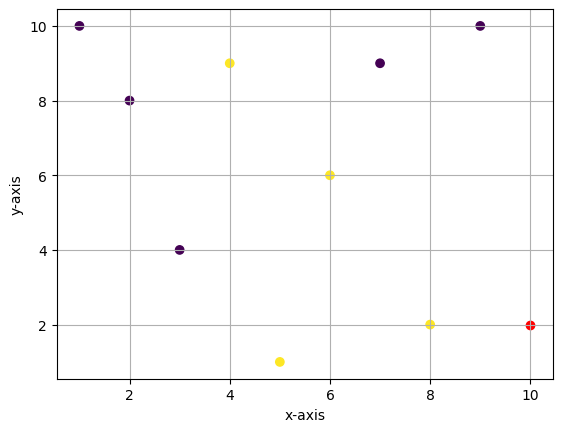

In [ ]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.scatter(Test_data[:,0], Test_data[:,1], c = 'r')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

In [ ]:
m,n = x.shape
classes = np.unique(y)
classes

array([0, 1])

In [ ]:
n_class = len(classes)
n_class

2

In [ ]:
class_probs = {}
mean_std = {}
mean = {}
std = {}

In [ ]:
for c in classes:
    class_probs[c] = len(y[y == c])/m
print(class_probs)

{np.int64(0): 0.5555555555555556, np.int64(1): 0.4444444444444444}


In [ ]:
for c in classes:
    x_c = x[y == c]
    mean_std[c] = [(x_c[:,i].mean(), x_c[:,i].std()) for i in range(n)]
print(mean_std)
print(mean_std[0][0])

[[(np.float64(4.4), np.float64(3.0724582991474434)), (np.float64(8.2), np.float64(2.2271057451320084))], [(np.float64(5.75), np.float64(1.479019945774904)), (np.float64(4.5), np.float64(3.2015621187164243))]]
(np.float64(4.4), np.float64(3.0724582991474434))


In [ ]:
c = [1, 20, 30]
for k in enumerate(c):
    print(k)
for k,l in enumerate(c):
    print(l)

(0, 1)
(1, 20)
(2, 30)
1
20
30


In [ ]:
prediction = []

for X in Test_data:
    class_scores = np.zeros(n_class)

    for i,c in enumerate(classes):
        class_scores[i] = np.log(class_probs[c])
        for j in range(n):
            mean, std = mean_std[c][j]

            exponent = -((X[j] - mean) ** 2)/ (2 * std ** 2)
            class_scores[i] += np.log(1 / (np.sqrt(2 * np.pi) * std)) + exponent

    predicted_class = classes[np.argmax(class_scores)]
    prediction.append(predicted_class)

print(class_scores)
print(prediction)

[-9.88486154 -8.63727528]
[np.int64(1)]
